In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import missingno

In [2]:
# Reading all required files using pandas
dealer_attributes_df = pd.read_excel('HELM/dealer_attributes.xlsx', dtype={'Dealer Code':str})
dealer_segment_df = pd.read_csv('HELM/dealer segmentation.csv')
dealer_state_zip_df = pd.read_excel('HELM/Dealer state zip code.xlsx')
plan_code_df = pd.read_csv('HELM/plan codes.csv')
sales_df = pd.read_csv('HELM/Sales.csv', dtype={'BUCode':str})
plan_value_df = pd.read_excel('HELM/Plan Value.xlsx')

# Sales DF preprocessing for Join

In [3]:
sales_df.dtypes

BUCode          object
Segmentation    object
VIN first 11    object
Vin next 6       int64
VIN             object
PlanType        object
SOW_PlanType    object
PSOW_PWPID      object
plancode        object
salesdate       object
ContractCnt      int64
SaleSource      object
dtype: object

In [4]:
# Rows and Cols for Sales DF
sales_df.shape

(818082, 12)

In [5]:
# Converting SalesDate column to type datetime
sales_df['salesdate'] = pd.to_datetime(sales_df['salesdate'])

In [6]:
# Filtering records where year >= 2021
sales_df = sales_df[sales_df['salesdate'].dt.year>=2021]

In [7]:
sales_df.shape

(804267, 12)

In [8]:
# Unique BUCodes in Sales DF
sales_df['BUCode'].unique().shape

(2774,)

In [9]:
sales_df['BUCode'].str.len().unique()

array([5, 4], dtype=int64)

In [10]:
sales_df['BUCode'] = sales_df['BUCode'].str.zfill(5)

In [11]:
sales_df['BUCode'].str.len().unique()

array([5], dtype=int64)

In [12]:
# Removing records whose BUCode starts with 'S' 
sales_df = sales_df[~sales_df['BUCode'].str.contains('S', case=False)].reset_index(drop=True)

In [13]:
sales_df['Segmentation'].unique()

array(['F2F', 'BDT', 'BCIDM', 'Term', 'TERM', 'EXCL'], dtype=object)

In [14]:
sales_df = sales_df[sales_df['Segmentation'].str.contains('|'.join(['F2F', 'BDT', 'BCIDM']))]

In [15]:
sales_df['Segmentation'].unique()

array(['F2F', 'BDT', 'BCIDM'], dtype=object)

In [16]:
sales_df

,BUCode,Segmentation,VIN first 11,Vin next 6,VIN,PlanType,SOW_PlanType,PSOW_PWPID,plancode,salesdate,ContractCnt,SaleSource
0,45026,F2F,19UDE2F73HA,227848,19UDE2F73HA227848,S,OTHER,LOF,ECPSR34N,2022-10-06,1,SVL
1,45598,F2F,19UDE2F7XKA,318943,19UDE2F7XKA318943,U,MAJOR,Used Majors Stated Time,UM3362N,2022-10-03,1,FIN
2,45598,F2F,19UDE2F7XKA,368813,19UDE2F7XKA368813,S,C&M,Gap,GAPWUZN,2022-10-03,1,FIN
3,60590,F2F,19UDE2F7XLA,777457,19UDE2F7XLA777457,S,OTHER,Owner Care,MA3N,2022-10-10,1,FIN
4,27038,F2F,19UDE4H32PA,491209,19UDE4H32PA491209,S,C&M,Gap,GAPWUZN,2022-12-10,1,FIN
...,...,...,...,...,...,...,...,...,...,...,...,...
229448,69408,F2F,ZN661YUS9KX,689951,ZN661YUS9KX689951,S,C&M,Tire & Wheel,RHTWPREM5,2022-12-03,1,FIN
229449,69069,F2F,ZN661ZUA5MX,163636,ZN661ZUA5MX163636,S,C&M,Gap,GAPWUZN,2022-11-09,1,FIN
229450,69408,F2F,ZN661ZUM0NX,608171,ZN661ZUM0NX608171,S,C&M,Tire & Wheel,RHTWPREM7,2022-11-28,1,FIN
229451,69408,F2F,ZN661ZUM7NX,29612,ZN661ZUM7NX029612,S,C&M,Tire & Wheel,RHTWPREM2,2022-11-08,1,FIN


# PreProcessing Dealer Attribute DF

In [17]:
dealer_attributes_df

,Dealer Code,Group Flag,State,Zip Code,Dealer Map Lattitude,Dealer Map Longitude,Sales Group Size,Consolidated Franchise Code,Appointment Date
0,5002,No Group,PA,19073,39.9749,-75.4466,E,CDTJR,1954-11-24
1,5037,No Group,MI,48471,43.4205,-82.8670,B,CDTJR,1954-10-26
2,5239,No Group,IL,62448,38.9910,-88.1507,A,CDTJR,1953-11-13
3,5475,No Group,IN,47546,38.3689,-86.9419,B,CDTJR,1952-09-01
4,5504,No Group,IA,50638,42.3615,-92.7681,A,CDTJR,1952-06-01
...,...,...,...,...,...,...,...,...,...
2602,69411,No Group,FL,34231,27.2429,-82.5086,B,Y,2021-07-15
2603,69412,No Group,NJ,7632,40.8745,-73.9528,B,Y,2021-10-18
2604,69413,No Group,TX,78729,30.4395,-97.7725,C,Y,2021-11-08
2605,69414,No Group,NY,10019,40.7692,-73.9948,D,Y,2021-12-20


In [18]:
# Making BUCode of Length 5
dealer_attributes_df['Dealer Code'] = dealer_attributes_df['Dealer Code'].str.zfill(5)

In [19]:
dealer_attributes_df['Dealer Code'].str.len().unique()

array([5], dtype=int64)

# Joining Sales DF and Dealer Attribute DF

In [20]:
sales_df = sales_df.merge(dealer_attributes_df, how='inner', left_on='BUCode', right_on='Dealer Code')

# PreProcessing Dealer Segment DF

In [21]:
dealer_segment_df

,Territory,BCName,BUCode,Segmentation
0,CA01,California,24105,F2F
1,CA01,California,26974,F2F
2,CA01,California,27021,F2F
3,CA01,California,27035,F2F
4,CA01,California,27100,F2F
...,...,...,...,...
6448,WEB1,West,67858,BCIDM
6449,WEB1,West,68009,BCIDM
6450,WEB1,West,68488,BCIDM
6451,WEB1,West,69047,BCIDM


In [22]:
# Length of BUCodes
dealer_segment_df['BUCode'].str.len().unique()

array([5, 4, 1, 2, 3], dtype=int64)

In [23]:
# Making the length of BUCodes to 5
dealer_segment_df['BUCode'] = dealer_segment_df['BUCode'].str.zfill(5)

In [24]:
dealer_segment_df['BUCode'].str.len().unique()

array([5], dtype=int64)

# Joining Sales DF and Dealer Segment DF

In [25]:
sales_df = sales_df.merge(dealer_segment_df, how='left', on='BUCode')

# PreProcessing Dealer State Zip DF

In [26]:
dealer_state_zip_df

,Dealer Code,Dealer State,Zip Code,Market
0,00001,NJ,07001-2240,USA
1,00002,NJ,07001,USA
2,00002,GA,30096,USA
3,00003,MD,21224,USA
4,00004,WA,98004,USA
...,...,...,...,...
13018,Z0005,NJ,08085,USA
13019,Z0006,IL,60191,USA
13020,Z0007,NV,89506,USA
13021,Z0009,TN,38115,USA


In [27]:
dealer_state_zip_df['Dealer Code'].str.len().unique()

array([5], dtype=int64)

In [28]:
print(len(dealer_state_zip_df['Dealer Code'].unique()))

12976


Dealer State Zip file has different Zip Codes for Same Dealer and Zip Code have alphabetical character and not standard

# PreProcessing Plan Code DF

In [29]:
plan_code_df

,PlanType,PlanCategory,PlanCode,Description
0,EXCLUDE,Exclude,24DBLINK,BUSINESS LINK - DIESEL ESSENTIAL CARE - 2 YRS/...
1,EXCLUDE,Exclude,26GBLINK,BUSINESS LINK - ESSENTIAL CARE - 2 YRS / 6 OIL...
2,MAJOR,New Majors Stated Time,2MAX,"TWO YEAR MAX CARE PLUS - 30,000 MILES - $100 D..."
3,MAJOR,New Majors Stated Time,2MAX85,"TWO YEAR MAX CARE PLUS - 85,000 MILES - $100 D..."
4,MAJOR,New Majors Stated Time,2MAXUL,TWO YEAR MAX CARE PLUS - UNLIMITED MILES - $10...
...,...,...,...,...
9918,EXCLUDE,Exclude,XPP4200L,"48/60,000 POWERTRAIN CARE PLUS"
9919,EXCLUDE,Exclude,XPP4200M,NaN
9920,EXCLUDE,Exclude,XPP450L,"48/60,000 POWERTRAIN CARE PLUS"
9921,EXCLUDE,Exclude,XPP450M,NaN


In [30]:
# Removing unnecessary trailing spaces before and after the string
plan_code_df['PlanCode'] = plan_code_df['PlanCode'].str.strip()

In [31]:
sales_df['plancode'][0]

'ECPSR34N  '

In [32]:
sales_df['plancode'] = sales_df['plancode'].str.strip()

# Joining Sales DF and Plan Code DF

In [33]:
sales_df = sales_df.merge(plan_code_df, how='left', left_on='plancode', right_on='PlanCode')

In [34]:
sales_df

,BUCode,Segmentation_x,VIN first 11,Vin next 6,VIN,PlanType_x,SOW_PlanType,PSOW_PWPID,plancode,salesdate,...,Sales Group Size,Consolidated Franchise Code,Appointment Date,Territory,BCName,Segmentation_y,PlanType_y,PlanCategory,PlanCode,Description
0,45026,F2F,19UDE2F73HA,227848,19UDE2F73HA227848,S,OTHER,LOF,ECPSR34N,2022-10-06,...,C,CDTJR,2002-04-03,SE01,Southeast,F2F,OTHER,LOF,ECPSR34N,Essential Care Platinum w/ Rot.-Synthetic Gas
1,45026,F2F,19XFB2F54CE,813127,19XFB2F54CE813127,S,OTHER,LOF,ECPS23N,2022-10-20,...,C,CDTJR,2002-04-03,SE01,Southeast,F2F,OTHER,LOF,ECPS23N,ESSENTIAL CARE PLATINUM - 2 YEARS / 3 OIL CHAN...
2,45026,F2F,1C3CDFBB7GD,460433,1C3CDFBB7GD460433,S,OTHER,LOF,ECPSR34N,2022-10-05,...,C,CDTJR,2002-04-03,SE01,Southeast,F2F,OTHER,LOF,ECPSR34N,Essential Care Platinum w/ Rot.-Synthetic Gas
3,45026,F2F,1C4BJWDG0EL,534154,1C4BJWDG0EL534154,S,OTHER,LOF,ECGR34N,2022-12-19,...,C,CDTJR,2002-04-03,SE01,Southeast,F2F,OTHER,LOF,ECGR34N,Essential Care Gold w/ Rot.-Synthetic Blend
4,45026,F2F,1C4BJWDG9HL,585361,1C4BJWDG9HL585361,S,OTHER,LOF,ECGR34N,2022-12-21,...,C,CDTJR,2002-04-03,SE01,Southeast,F2F,OTHER,LOF,ECGR34N,Essential Care Gold w/ Rot.-Synthetic Blend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215927,69402,BDT,ZASPAKBN8N7,64578,ZASPAKBN8N7064578,S,OTHER,Owner Care,ARMAINT440,2022-11-26,...,A,Y,2020-12-22,PNE1,Northeast,BDT,OTHER,Owner Care,ARMAINT440,"ALFA ROMEO SCHEDULED MAINT 4 YEARS/40,000 MILES"
215928,69215,BDT,ZASPAKBN8P7,926770,ZASPAKBN8P7926770,N,MAJOR,New Majors Stated Time,ARM7100,2022-12-10,...,A,XY,2013-04-29,PSE1,Southeast,BDT,MAJOR,New Majors Stated Time,ARM7100,"AR ADDED CARE 7 YEARS / 100,000 MILES $100 DED..."
215929,69388,BDT,ZASPAKBNXL7,89170,ZASPAKBNXL7089170,U,MAJOR,Used Majors Stated Time,UM5602N,2022-12-16,...,A,XY,2019-10-10,PMW1,MidWest,BDT,MAJOR,Used Majors Stated Time,UM5602N,"5 YEARS / 60,000 MILES MAXIMUM CARE - $200 DED..."
215930,45715,BDT,ZFBERFAB5J6,783668,ZFBERFAB5J6783668,U,MAJOR,Used Majors Stated Time,XAP2UNL5N,2022-10-28,...,C,CDTJR,2017-08-17,PNE1,Northeast,BDT,MAJOR,Used Majors Stated Time,XAP2UNL5N,PRE-OWNED 5 YEARS / UNLIMITED MILES ADDED CARE...


# PreProcessing Plan Value DF

In [35]:
plan_value_df

,PlanCategory,Unique Plan Codes,Average Price
0,Auto Appearance Care,40,260.01
1,CPOV Base Warranties,18,421.24
2,Exclude,7841,27.07
3,Gap,34,366.20
4,Lease Wear & Tear,87,449.10
5,Limited Warranties,12,193.87
6,LOF,395,153.67
7,Multicare,30,394.02
8,New Majors Stated Time,732,1428.06
9,New Majors Unlimited,18,2633.26


In [36]:
# Checking Sales_DF-Plan Category is in plan_value_DF-Plan Category
sales_df['PlanCategory'].isin(plan_value_df['PlanCategory']).all()

True

# Joining Sales DF and Plan Value DF

In [37]:
sales_df = sales_df.merge(plan_value_df, how='left', on='PlanCategory')

In [38]:
sales_df

,BUCode,Segmentation_x,VIN first 11,Vin next 6,VIN,PlanType_x,SOW_PlanType,PSOW_PWPID,plancode,salesdate,...,Appointment Date,Territory,BCName,Segmentation_y,PlanType_y,PlanCategory,PlanCode,Description,Unique Plan Codes,Average Price
0,45026,F2F,19UDE2F73HA,227848,19UDE2F73HA227848,S,OTHER,LOF,ECPSR34N,2022-10-06,...,2002-04-03,SE01,Southeast,F2F,OTHER,LOF,ECPSR34N,Essential Care Platinum w/ Rot.-Synthetic Gas,395,153.67
1,45026,F2F,19XFB2F54CE,813127,19XFB2F54CE813127,S,OTHER,LOF,ECPS23N,2022-10-20,...,2002-04-03,SE01,Southeast,F2F,OTHER,LOF,ECPS23N,ESSENTIAL CARE PLATINUM - 2 YEARS / 3 OIL CHAN...,395,153.67
2,45026,F2F,1C3CDFBB7GD,460433,1C3CDFBB7GD460433,S,OTHER,LOF,ECPSR34N,2022-10-05,...,2002-04-03,SE01,Southeast,F2F,OTHER,LOF,ECPSR34N,Essential Care Platinum w/ Rot.-Synthetic Gas,395,153.67
3,45026,F2F,1C4BJWDG0EL,534154,1C4BJWDG0EL534154,S,OTHER,LOF,ECGR34N,2022-12-19,...,2002-04-03,SE01,Southeast,F2F,OTHER,LOF,ECGR34N,Essential Care Gold w/ Rot.-Synthetic Blend,395,153.67
4,45026,F2F,1C4BJWDG9HL,585361,1C4BJWDG9HL585361,S,OTHER,LOF,ECGR34N,2022-12-21,...,2002-04-03,SE01,Southeast,F2F,OTHER,LOF,ECGR34N,Essential Care Gold w/ Rot.-Synthetic Blend,395,153.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215927,69402,BDT,ZASPAKBN8N7,64578,ZASPAKBN8N7064578,S,OTHER,Owner Care,ARMAINT440,2022-11-26,...,2020-12-22,PNE1,Northeast,BDT,OTHER,Owner Care,ARMAINT440,"ALFA ROMEO SCHEDULED MAINT 4 YEARS/40,000 MILES",247,542.57
215928,69215,BDT,ZASPAKBN8P7,926770,ZASPAKBN8P7926770,N,MAJOR,New Majors Stated Time,ARM7100,2022-12-10,...,2013-04-29,PSE1,Southeast,BDT,MAJOR,New Majors Stated Time,ARM7100,"AR ADDED CARE 7 YEARS / 100,000 MILES $100 DED...",732,1428.06
215929,69388,BDT,ZASPAKBNXL7,89170,ZASPAKBNXL7089170,U,MAJOR,Used Majors Stated Time,UM5602N,2022-12-16,...,2019-10-10,PMW1,MidWest,BDT,MAJOR,Used Majors Stated Time,UM5602N,"5 YEARS / 60,000 MILES MAXIMUM CARE - $200 DED...",365,1541.83
215930,45715,BDT,ZFBERFAB5J6,783668,ZFBERFAB5J6783668,U,MAJOR,Used Majors Stated Time,XAP2UNL5N,2022-10-28,...,2017-08-17,PNE1,Northeast,BDT,MAJOR,Used Majors Stated Time,XAP2UNL5N,PRE-OWNED 5 YEARS / UNLIMITED MILES ADDED CARE...,365,1541.83


# Sales DF Processing

In [39]:
sales_df.columns

Index(['BUCode', 'Segmentation_x', 'VIN first 11', 'Vin next 6', 'VIN',
       'PlanType_x', 'SOW_PlanType', 'PSOW_PWPID', 'plancode', 'salesdate',
       'ContractCnt', 'SaleSource', 'Dealer Code', 'Group Flag', 'State',
       'Zip Code', 'Dealer Map Lattitude', 'Dealer Map Longitude',
       'Sales Group Size', 'Consolidated Franchise Code', 'Appointment Date',
       'Territory', 'BCName', 'Segmentation_y', 'PlanType_y', 'PlanCategory',
       'PlanCode', 'Description', 'Unique Plan Codes', 'Average Price'],
      dtype='object')

In [40]:
# Dropping duplicate columns that got generated while joining
sales_df.drop(columns=['Segmentation_y', 'PlanType_y', 'PlanCode', 'Unique Plan Codes'], inplace=True)

In [41]:
# Renaming the Columns
sales_df.rename(columns={'Segmentation_x':'Segmentation', 'PlanType_x':'PlanType'}, inplace=True)

In [42]:
sales_df.columns

Index(['BUCode', 'Segmentation', 'VIN first 11', 'Vin next 6', 'VIN',
       'PlanType', 'SOW_PlanType', 'PSOW_PWPID', 'plancode', 'salesdate',
       'ContractCnt', 'SaleSource', 'Dealer Code', 'Group Flag', 'State',
       'Zip Code', 'Dealer Map Lattitude', 'Dealer Map Longitude',
       'Sales Group Size', 'Consolidated Franchise Code', 'Appointment Date',
       'Territory', 'BCName', 'PlanCategory', 'Description', 'Average Price'],
      dtype='object')

In [43]:
sales_df['Zip Code'] = sales_df['Zip Code'].astype('Int64')

In [44]:
sales_df['Zip Code']

0         28092
1         28092
2         28092
3         28092
4         28092
          ...  
215927    12110
215928    37922
215929    60540
215930     2842
215931    53142
Name: Zip Code, Length: 215932, dtype: Int64

# Sales DF Analysis

In [45]:
sales_df.isna().sum()

BUCode                             0
Segmentation                       0
VIN first 11                       0
Vin next 6                         0
VIN                                0
PlanType                           0
SOW_PlanType                       0
PSOW_PWPID                         0
plancode                           0
salesdate                          0
ContractCnt                        0
SaleSource                         0
Dealer Code                        0
Group Flag                         0
State                              0
Zip Code                           0
Dealer Map Lattitude               0
Dealer Map Longitude               0
Sales Group Size                   0
Consolidated Franchise Code        0
Appointment Date                   0
Territory                          0
BCName                             0
PlanCategory                       0
Description                    26448
Average Price                      0
dtype: int64

<AxesSubplot:>

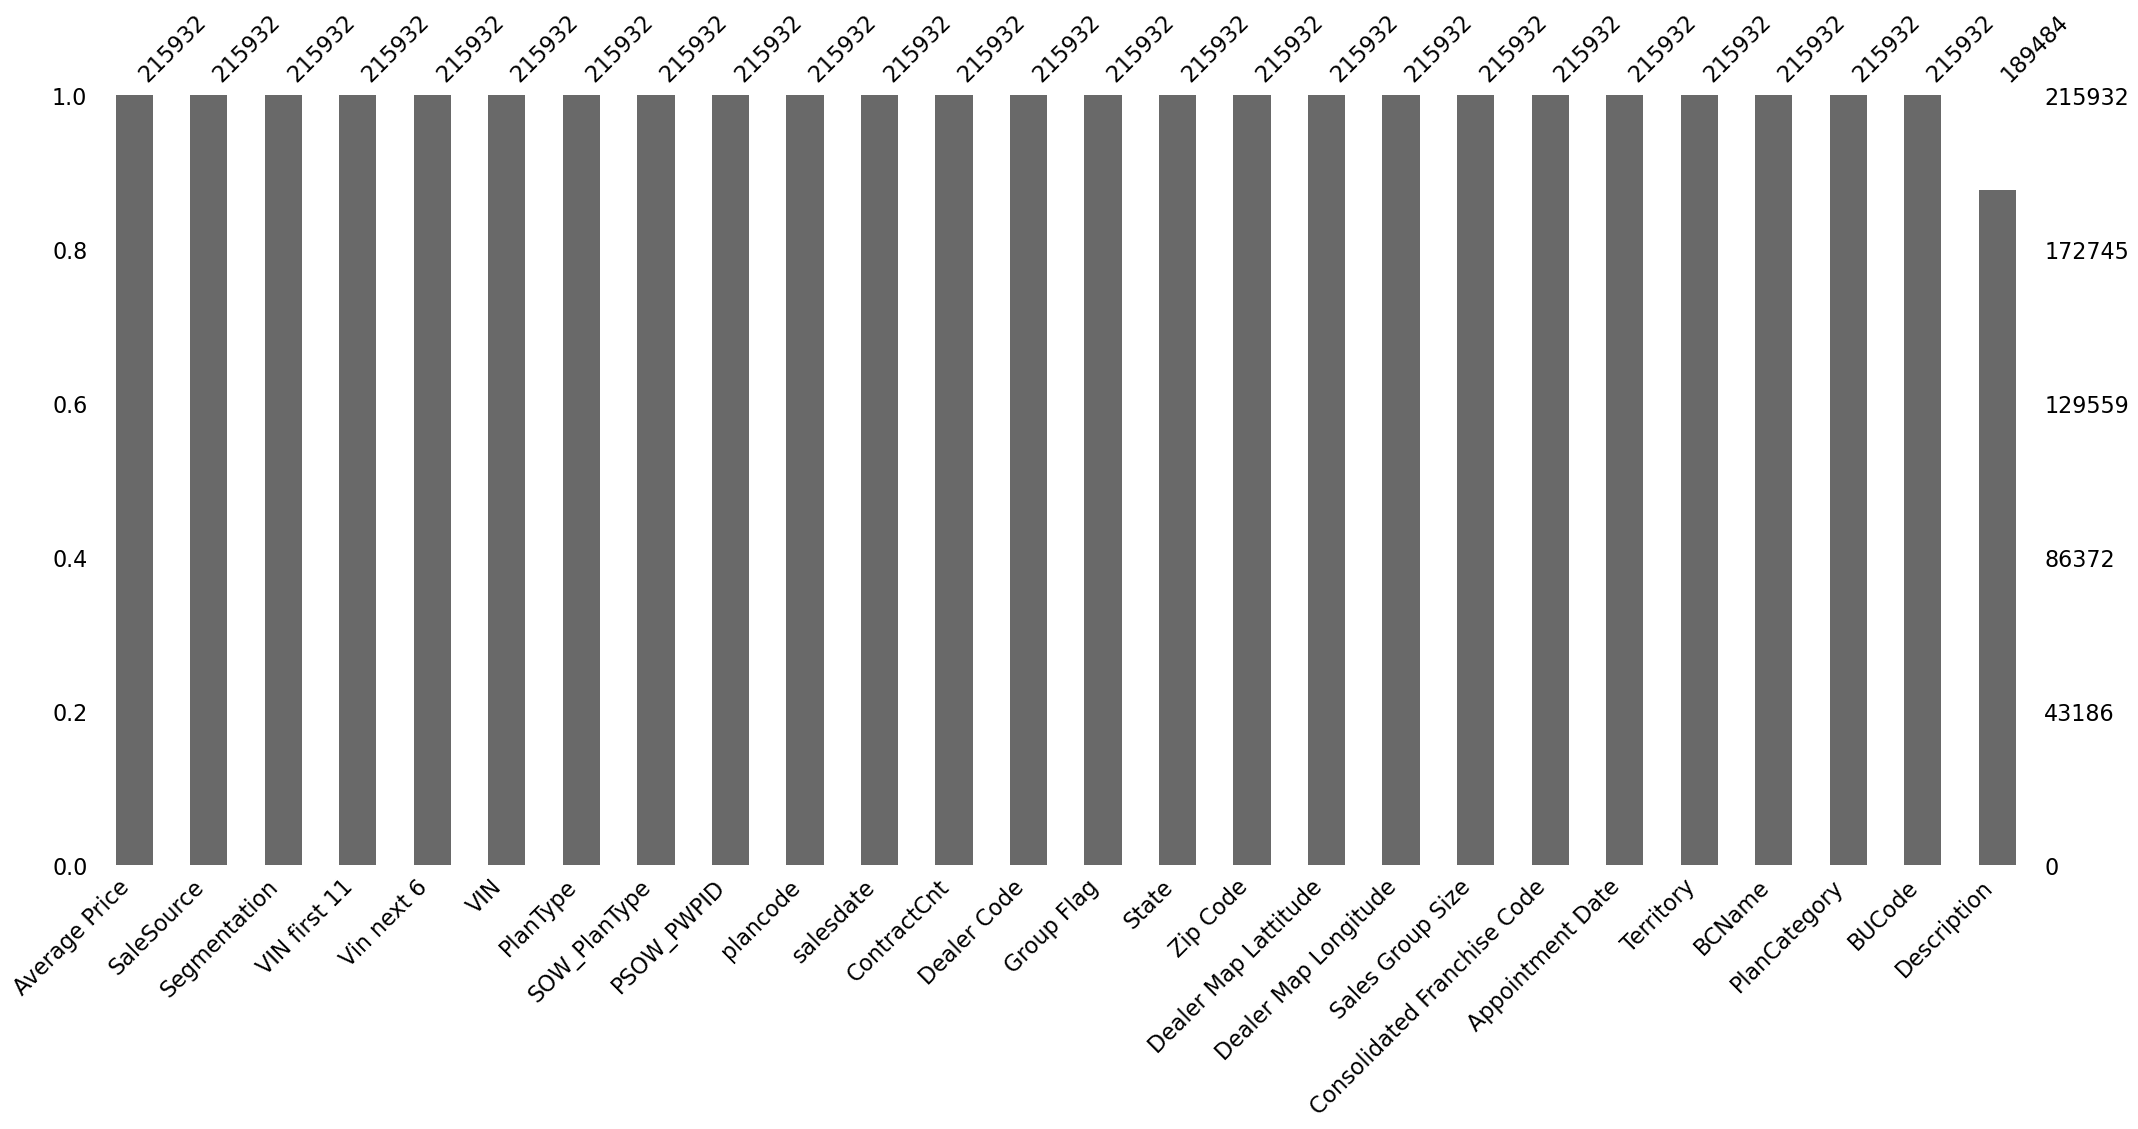

In [46]:
# This plot help us identify the missing values in each column
missingno.bar(sales_df, sort='descending')

In [47]:
sales_df[~sales_df['BUCode'].isin(dealer_attributes_df['Dealer Code'])]

,BUCode,Segmentation,VIN first 11,Vin next 6,VIN,PlanType,SOW_PlanType,PSOW_PWPID,plancode,salesdate,...,Dealer Map Lattitude,Dealer Map Longitude,Sales Group Size,Consolidated Franchise Code,Appointment Date,Territory,BCName,PlanCategory,Description,Average Price


In [48]:
sales_df.shape

(215932, 26)

In [49]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215932 entries, 0 to 215931
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   BUCode                       215932 non-null  object        
 1   Segmentation                 215932 non-null  object        
 2   VIN first 11                 215932 non-null  object        
 3   Vin next 6                   215932 non-null  int64         
 4   VIN                          215932 non-null  object        
 5   PlanType                     215932 non-null  object        
 6   SOW_PlanType                 215932 non-null  object        
 7   PSOW_PWPID                   215932 non-null  object        
 8   plancode                     215932 non-null  object        
 9   salesdate                    215932 non-null  datetime64[ns]
 10  ContractCnt                  215932 non-null  int64         
 11  SaleSource                

In [50]:
# Grouping the DF by VIN and taking the mean of the Average Price
sales_df['Revenue_Per_VIN'] = sales_df.groupby(by=['VIN'])['Average Price'].transform(np.mean)

In [51]:
sales_df.describe()

,Vin next 6,ContractCnt,Zip Code,Dealer Map Lattitude,Dealer Map Longitude,Average Price,Revenue_Per_VIN
count,215932.000000,215932.0,215932.000000,215932.000000,215932.000000,215932.000000,215932.000000
mean,496129.906600,1.0,50029.907897,37.294838,-90.280787,544.984311,544.984311
std,290695.818031,0.0,27637.565949,5.346672,14.410191,531.329741,531.324360
min,2.000000,1.0,1020.000000,13.475600,-159.376000,27.070000,27.070000
25%,243840.750000,1.0,28079.000000,33.509500,-97.097100,153.670000,153.670000
50%,495390.500000,1.0,48302.000000,38.751200,-85.711600,421.240000,421.240000
75%,748532.250000,1.0,76504.000000,41.538500,-80.201400,449.100000,449.100000
max,999998.000000,1.0,99801.000000,64.814800,144.771100,2962.630000,2962.630000


# Data Visualization

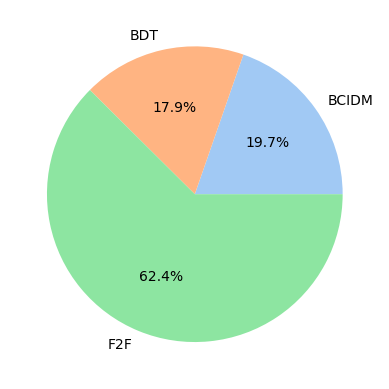

In [52]:
segment_val_counts = sales_df['Segmentation'].value_counts().sort_index()

# Plotting Pie chart for visualizing the counts of Segmentations
plt.pie(segment_val_counts, 
        labels = segment_val_counts.index, 
        colors = sns.color_palette('pastel')[0:sales_df['Segmentation'].unique().shape[0]], 
        autopct='%1.1f%%')
plt.show()

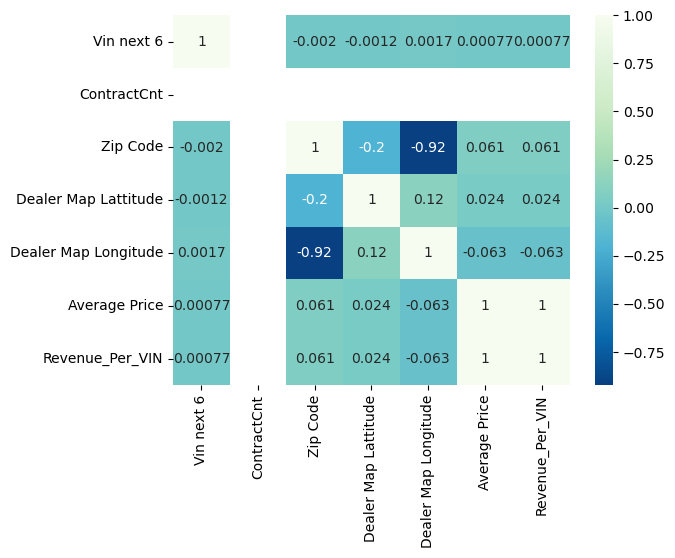

In [53]:
# Heatmap based on the correlations of sales dataframe
sns.heatmap(sales_df.corr(), cmap='GnBu_r', annot=True)
plt.show()

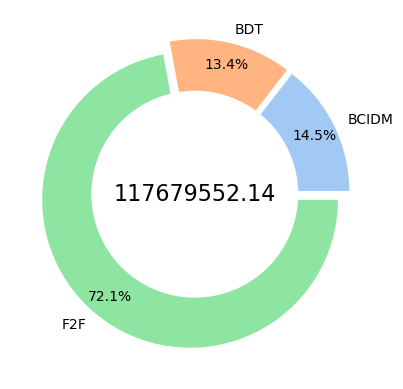

In [54]:
avg_price_sum_by_segment = sales_df[['Average Price', 'Segmentation']].groupby(by='Segmentation').sum().sort_index()

explode = (0.05, 0.05, 0.05)

plt.pie(avg_price_sum_by_segment['Average Price'], 
        labels=avg_price_sum_by_segment['Average Price'].index,  
        colors = sns.color_palette('pastel')[0:sales_df['Segmentation'].unique().shape[0]], 
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)


centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.text(0, 0, round(sum(avg_price_sum_by_segment['Average Price']), 2), ha='center', va='center', fontsize=16)

plt.show()

In [55]:
sales_df['VIN1_Car_Built'] = sales_df['VIN first 11'].str[0] #Where the car was built
sales_df['VIN23_Manufacturer'] = sales_df['VIN first 11'].str[1:3] #The manufacturer
sales_df['VIN48_Brand_Engine_Type'] = sales_df['VIN first 11'].str[3:8] #Portrait of the vehicle: brand, engine size and type
sales_df['VIN238_Flex_Fuel'] = sales_df['VIN first 11'].str[1:3] + sales_df['VIN first 11'].str[7] #Flex fuel vehicles can be id'ed w/ this
sales_df['VIN10_Model_Year'] = sales_df['VIN first 11'].str[9] #Model year of the car
sales_df['VIN11_Assembly'] = sales_df['VIN first 11'].str[10] #Assembly plant

In [56]:
sales_df

,BUCode,Segmentation,VIN first 11,Vin next 6,VIN,PlanType,SOW_PlanType,PSOW_PWPID,plancode,salesdate,...,PlanCategory,Description,Average Price,Revenue_Per_VIN,VIN1_Car_Built,VIN23_Manufacturer,VIN48_Brand_Engine_Type,VIN238_Flex_Fuel,VIN10_Model_Year,VIN11_Assembly
0,45026,F2F,19UDE2F73HA,227848,19UDE2F73HA227848,S,OTHER,LOF,ECPSR34N,2022-10-06,...,LOF,Essential Care Platinum w/ Rot.-Synthetic Gas,153.67,153.67,1,9U,DE2F7,9U7,H,A
1,45026,F2F,19XFB2F54CE,813127,19XFB2F54CE813127,S,OTHER,LOF,ECPS23N,2022-10-20,...,LOF,ESSENTIAL CARE PLATINUM - 2 YEARS / 3 OIL CHAN...,153.67,153.67,1,9X,FB2F5,9X5,C,E
2,45026,F2F,1C3CDFBB7GD,460433,1C3CDFBB7GD460433,S,OTHER,LOF,ECPSR34N,2022-10-05,...,LOF,Essential Care Platinum w/ Rot.-Synthetic Gas,153.67,153.67,1,C3,CDFBB,C3B,G,D
3,45026,F2F,1C4BJWDG0EL,534154,1C4BJWDG0EL534154,S,OTHER,LOF,ECGR34N,2022-12-19,...,LOF,Essential Care Gold w/ Rot.-Synthetic Blend,153.67,153.67,1,C4,BJWDG,C4G,E,L
4,45026,F2F,1C4BJWDG9HL,585361,1C4BJWDG9HL585361,S,OTHER,LOF,ECGR34N,2022-12-21,...,LOF,Essential Care Gold w/ Rot.-Synthetic Blend,153.67,153.67,1,C4,BJWDG,C4G,H,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215927,69402,BDT,ZASPAKBN8N7,64578,ZASPAKBN8N7064578,S,OTHER,Owner Care,ARMAINT440,2022-11-26,...,Owner Care,"ALFA ROMEO SCHEDULED MAINT 4 YEARS/40,000 MILES",542.57,542.57,Z,AS,PAKBN,ASN,N,7
215928,69215,BDT,ZASPAKBN8P7,926770,ZASPAKBN8P7926770,N,MAJOR,New Majors Stated Time,ARM7100,2022-12-10,...,New Majors Stated Time,"AR ADDED CARE 7 YEARS / 100,000 MILES $100 DED...",1428.06,1428.06,Z,AS,PAKBN,ASN,P,7
215929,69388,BDT,ZASPAKBNXL7,89170,ZASPAKBNXL7089170,U,MAJOR,Used Majors Stated Time,UM5602N,2022-12-16,...,Used Majors Stated Time,"5 YEARS / 60,000 MILES MAXIMUM CARE - $200 DED...",1541.83,1541.83,Z,AS,PAKBN,ASN,L,7
215930,45715,BDT,ZFBERFAB5J6,783668,ZFBERFAB5J6783668,U,MAJOR,Used Majors Stated Time,XAP2UNL5N,2022-10-28,...,Used Majors Stated Time,PRE-OWNED 5 YEARS / UNLIMITED MILES ADDED CARE...,1541.83,1541.83,Z,FB,ERFAB,FBB,J,6


In [57]:
sales_df['VIN'].value_counts() # Here VIN is repeated atmost 2 times only for 4 records, this doesn't provide much information.

1C4RJHBG0PC027330    2
1C4HJXDN9LW439089    2
3C6UR5DL1NG678301    2
1C6SRFFT3MN360484    2
19UDE2F73HA227848    1
                    ..
1C4SJVFJ2NS361830    1
1C6HJTAG5PL062398    1
1C6HJTAG5PL164771    1
1C6HJTAG6NL035369    1
ZFBNF3B16MP682114    1
Name: VIN, Length: 215928, dtype: int64

In [58]:
sales_df['VIN first 11'].value_counts()

1C4RJFBG9LC    227
1C6SRFFT9NN    213
1C4RJFBG5LC    206
1C4RJFBGXLC    206
1C4RJFBG0LC    204
              ... 
1C4RDJFG8MC      1
1C4RDJFG1MC      1
1C4RDJFG0MC      1
1C4PJMJS6HD      1
ZFBNF3B16MP      1
Name: VIN first 11, Length: 36097, dtype: int64

In [59]:
# Storing the preprocessed sales df in to Sales Final Output csv file
sales_df.to_csv('HELM/Sales_Final_Output.csv', index=False)

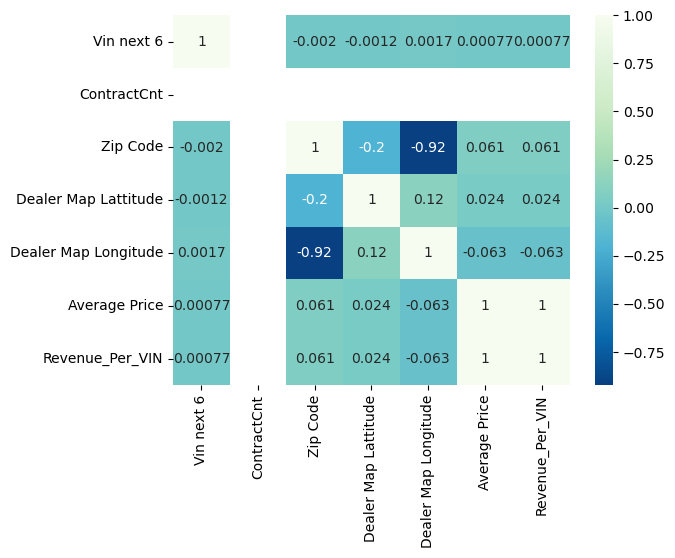

In [60]:
sns.heatmap(sales_df.corr(), cmap='GnBu_r', annot=True)
plt.show()

# What ARE Correlated with  revenue per Vehicle?

In [61]:
sales_df.head()

,BUCode,Segmentation,VIN first 11,Vin next 6,VIN,PlanType,SOW_PlanType,PSOW_PWPID,plancode,salesdate,...,PlanCategory,Description,Average Price,Revenue_Per_VIN,VIN1_Car_Built,VIN23_Manufacturer,VIN48_Brand_Engine_Type,VIN238_Flex_Fuel,VIN10_Model_Year,VIN11_Assembly
0,45026,F2F,19UDE2F73HA,227848,19UDE2F73HA227848,S,OTHER,LOF,ECPSR34N,2022-10-06,...,LOF,Essential Care Platinum w/ Rot.-Synthetic Gas,153.67,153.67,1,9U,DE2F7,9U7,H,A
1,45026,F2F,19XFB2F54CE,813127,19XFB2F54CE813127,S,OTHER,LOF,ECPS23N,2022-10-20,...,LOF,ESSENTIAL CARE PLATINUM - 2 YEARS / 3 OIL CHAN...,153.67,153.67,1,9X,FB2F5,9X5,C,E
2,45026,F2F,1C3CDFBB7GD,460433,1C3CDFBB7GD460433,S,OTHER,LOF,ECPSR34N,2022-10-05,...,LOF,Essential Care Platinum w/ Rot.-Synthetic Gas,153.67,153.67,1,C3,CDFBB,C3B,G,D
3,45026,F2F,1C4BJWDG0EL,534154,1C4BJWDG0EL534154,S,OTHER,LOF,ECGR34N,2022-12-19,...,LOF,Essential Care Gold w/ Rot.-Synthetic Blend,153.67,153.67,1,C4,BJWDG,C4G,E,L
4,45026,F2F,1C4BJWDG9HL,585361,1C4BJWDG9HL585361,S,OTHER,LOF,ECGR34N,2022-12-21,...,LOF,Essential Care Gold w/ Rot.-Synthetic Blend,153.67,153.67,1,C4,BJWDG,C4G,H,L


In [62]:
d = sales_df.fillna(0)

In [63]:
d.corr()

,Vin next 6,ContractCnt,Zip Code,Dealer Map Lattitude,Dealer Map Longitude,Average Price,Revenue_Per_VIN
Vin next 6,1.000000,NaN,-0.001994,-0.001164,0.001718,0.000766,0.000766
ContractCnt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip Code,-0.001994,NaN,1.000000,-0.195828,-0.921865,0.061425,0.061441
Dealer Map Lattitude,-0.001164,NaN,-0.195828,1.000000,0.117786,0.024066,0.024061
Dealer Map Longitude,0.001718,NaN,-0.921865,0.117786,1.000000,-0.063253,-0.063272
Average Price,0.000766,NaN,0.061425,0.024066,-0.063253,1.000000,0.999990
Revenue_Per_VIN,0.000766,NaN,0.061441,0.024061,-0.063272,0.999990,1.000000


In [65]:
filtered_sales_df = sales_df[['Segmentation', 'PlanType', 'plancode', 'SaleSource', 'Dealer Code', \
'Group Flag', 'State', 'Sales Group Size', 'Consolidated Franchise Code', 'Territory', 'BCName', \
'PlanCategory', 'Revenue_Per_VIN']] # SELECTION OF REQUIRED FEATURES MANUALLY

In [66]:
# Grouping the DF by plancode and getting the mean of revenue per VIN
plancode_avgrevenue = filtered_sales_df.groupby(by=['plancode'])['Revenue_Per_VIN'].agg('mean')

In [67]:
# Sorting the Average Revenue value in descending order.
plancode_avgrevenue = plancode_avgrevenue.sort_values(ascending=False)

In [68]:
fil_plancode_avgrevenue = plancode_avgrevenue[['CVM710N', 'WMT560N', 'GAPWUXN', 'UM3362N']]

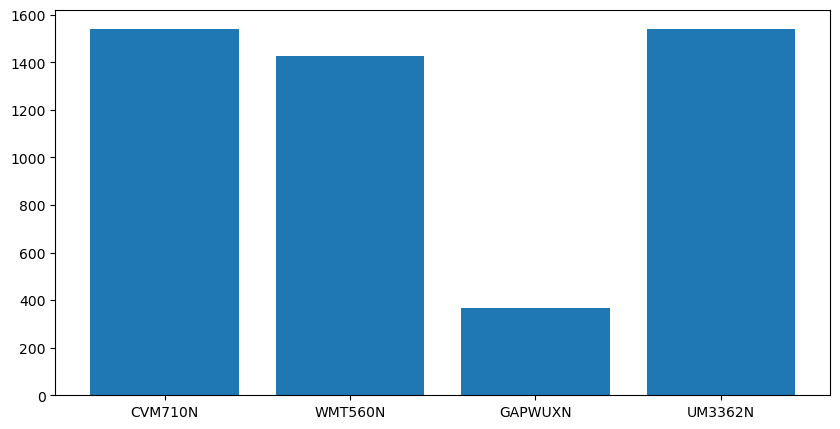

In [69]:
# Plotting the Bar plot using the plan code and their revenue
fig = plt.figure(figsize = (10, 5))
plt.bar(fil_plancode_avgrevenue.index, fil_plancode_avgrevenue.values)
plt.show()

In [70]:
plancode_avgrevenue

plancode
UAP4100N      2962.63
UM2100N       2962.63
UA2200N       2962.63
UP3200N       2962.63
UP3100N       2962.63
               ...   
ECOD23N         27.07
OC5460          27.07
ECODR12N        27.07
CALTIRE345      27.07
ECOD48N         27.07
Name: Revenue_Per_VIN, Length: 984, dtype: float64

In [71]:
# This function is reponsible for getting the correlation matric and building the heatmap out of it.
def get_corr(num_col, cat_col_x, cat_col_y):
    avg_price_pivot = sales_df.pivot_table(num_col, [cat_col_x, cat_col_y], aggfunc='sum').reset_index()
    avg_price_pivot = avg_price_pivot[avg_price_pivot[cat_col_x].isin(['CVM710N', 'WMT560N', 'GAPWUXN', 'UM3362N'])]
    Franchise_PlanCat_avg_price_corr_df = pd.DataFrame(index=avg_price_pivot[cat_col_y].unique(), columns=avg_price_pivot[cat_col_x].unique())
    for tup in avg_price_pivot.itertuples(index=False):
        Franchise_PlanCat_avg_price_corr_df.loc[tup[1], tup[0]] = tup[2]
    Franchise_PlanCat_avg_price_corr_df = Franchise_PlanCat_avg_price_corr_df.fillna(0)
    fig, ax = plt.subplots(figsize=(20,15))
    dataplot = sns.heatmap(Franchise_PlanCat_avg_price_corr_df, cmap="YlGnBu", annot=True, linewidths=.5, ax=ax, fmt='.2f')
    plt.show()

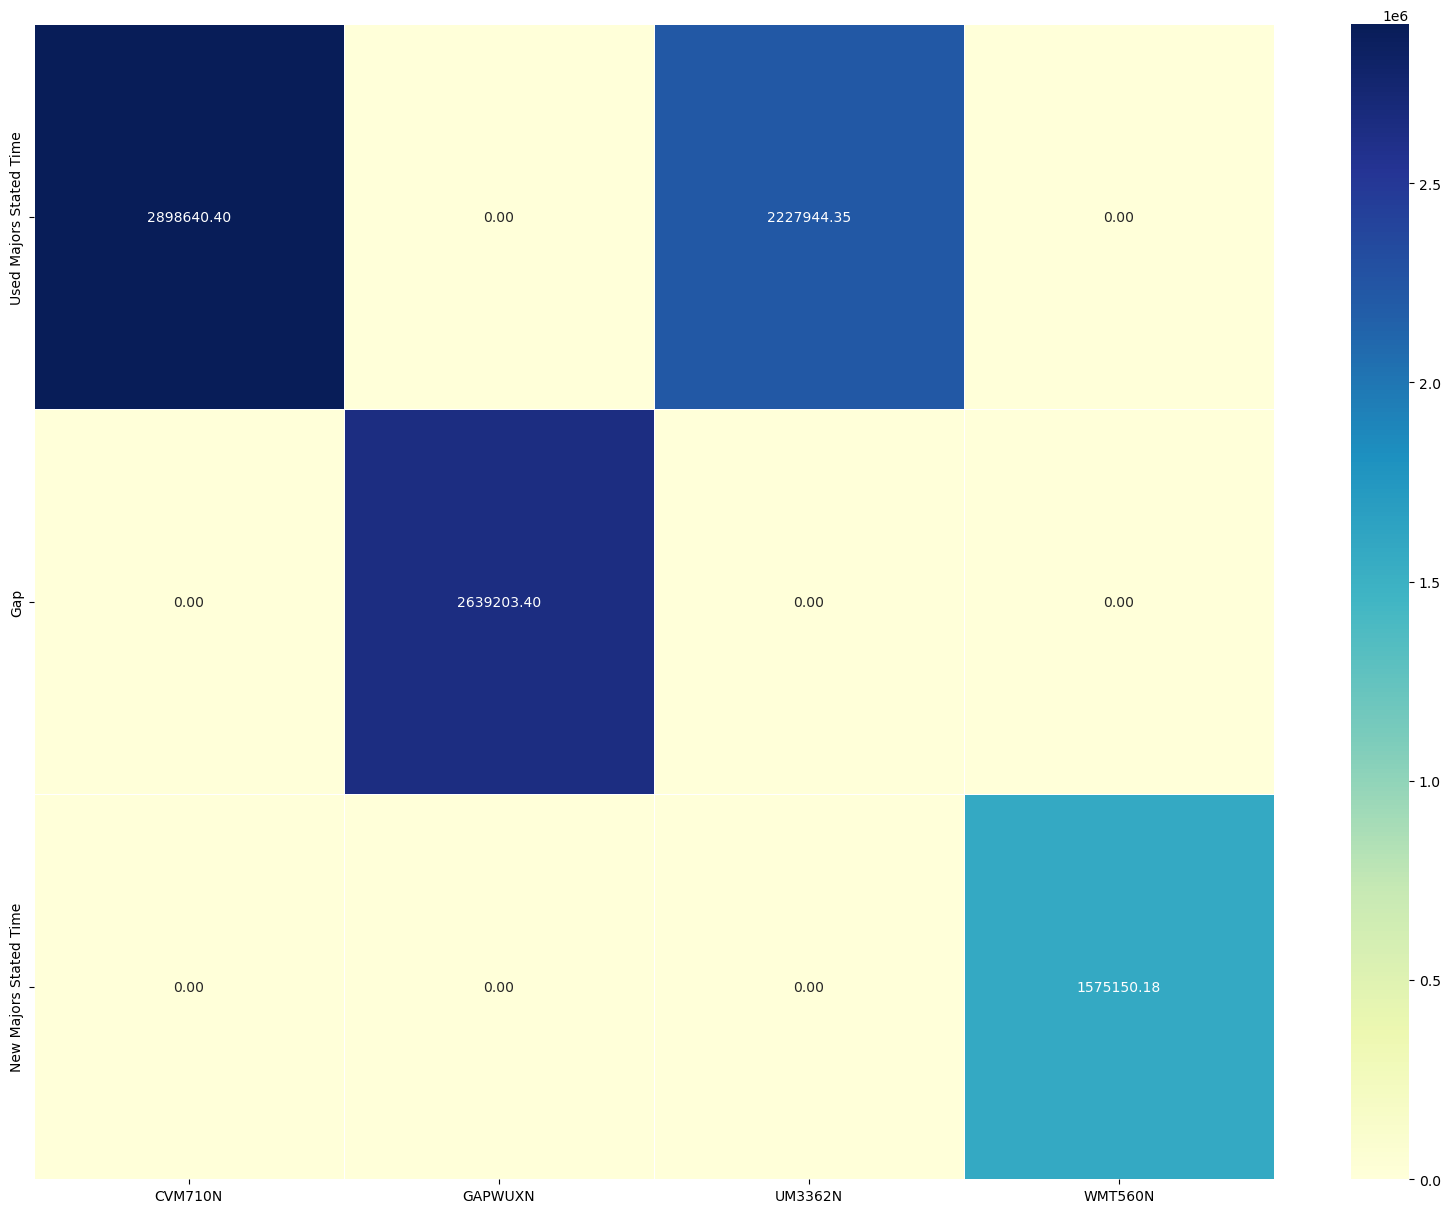

In [72]:
get_corr('Revenue_Per_VIN', 'plancode', 'PlanCategory')

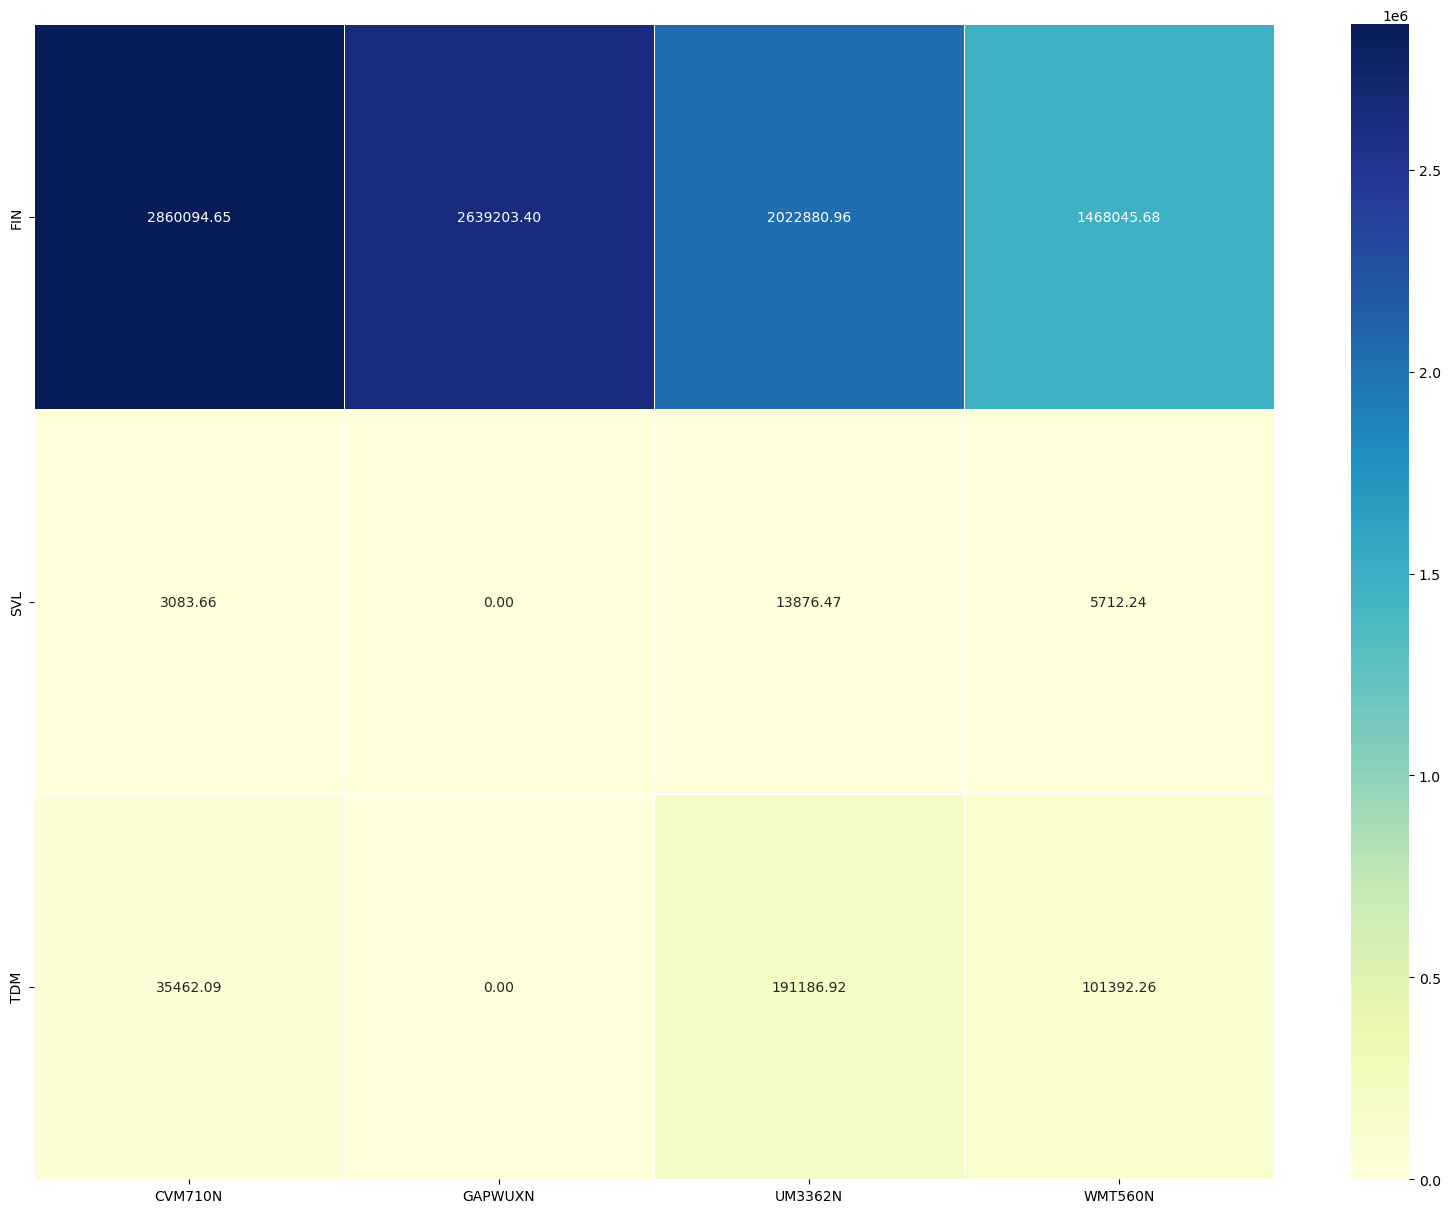

In [74]:
get_corr('Revenue_Per_VIN', 'plancode', 'SaleSource')

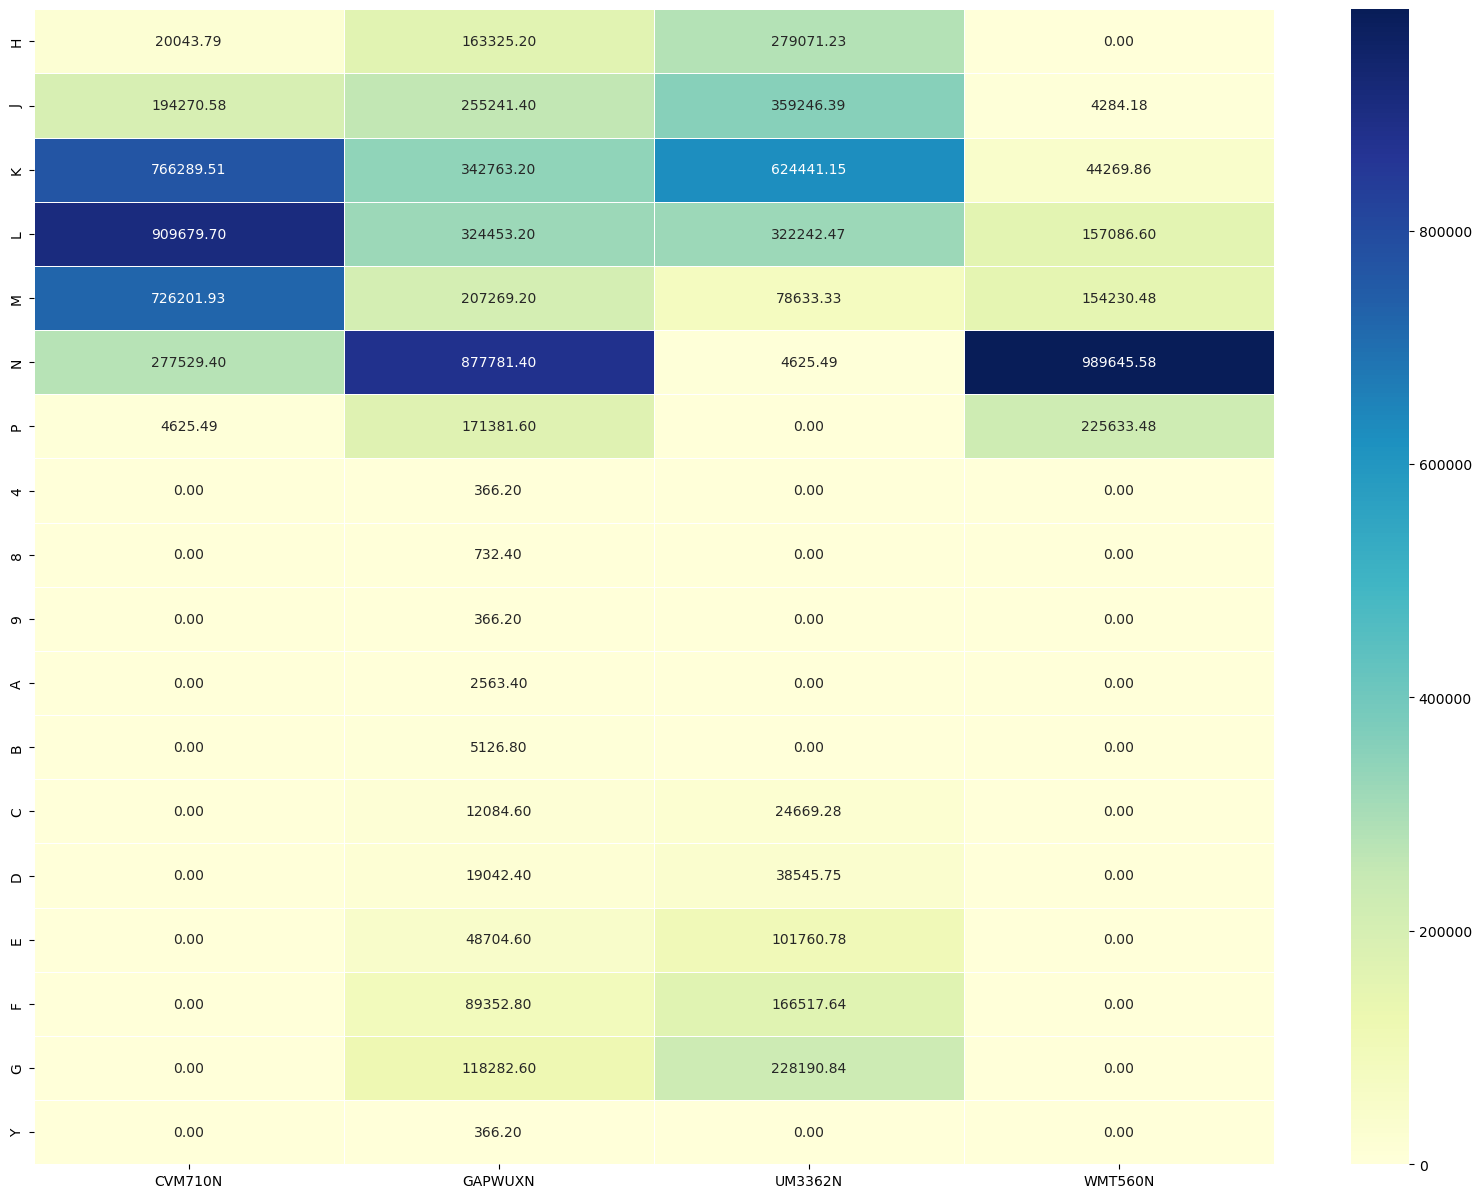

In [75]:
get_corr('Revenue_Per_VIN', 'plancode', 'VIN10_Model_Year')